In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

In [2]:
n = 20
delta_t = 1.
sigma = 0.1

A_spikes = np.sort(np.random.uniform(0, 1, n))
B_spikes = np.sort(np.random.uniform(0, 1, n))

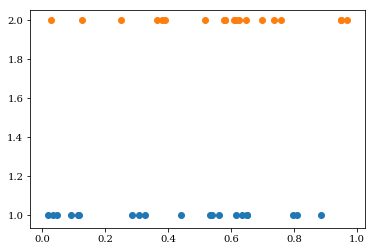

In [3]:
plt.figure()
plt.scatter(A_spikes, 1.*np.ones(A_spikes.shape[0]))
plt.scatter(B_spikes, 2.*np.ones(B_spikes.shape[0]))
plt.show()

In [4]:
C_spikes = np.array([])

A_counter = 0
for t in A_spikes:
    n_events = np.random.poisson(1., size=1)
    spikes = norm.rvs(loc=t+delta_t, scale=sigma, size=n_events)
    C_spikes= np.concatenate((C_spikes, spikes))
    A_counter += n_events
    

B_counter = 0
for t in B_spikes:
    n_events = np.random.poisson(2., size=1)
    spikes = norm.rvs(loc=t+delta_t, scale=sigma, size=n_events)
    C_spikes= np.concatenate((C_spikes, spikes))
    B_counter += n_events
    
C_spikes = np.sort(C_spikes)

In [5]:
pdf_A = np.zeros((C_spikes.shape[0], A_spikes.shape[0]))
for i in range(pdf_A.shape[1]):
    pdf_A[:,i] = norm.pdf(C_spikes, loc=A_spikes[i]+delta_t, scale=sigma) / pdf_A.shape[1]
pdf_A = np.sum(pdf_A, axis=1)    

pdf_B = np.zeros((C_spikes.shape[0], B_spikes.shape[0]))
for i in range(pdf_B.shape[1]):
    pdf_B[:,i] = norm.pdf(C_spikes, loc=B_spikes[i]+delta_t, scale=sigma) / pdf_B.shape[1]
pdf_B = np.sum(pdf_B, axis=1)    

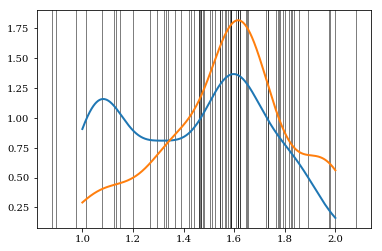

In [6]:
x_plot = np.linspace(1., 2., 10000, endpoint=True)
pdf_A = np.zeros((x_plot.shape[0], A_spikes.shape[0]))
for i in range(pdf_A.shape[1]):
    pdf_A[:,i] = norm.pdf(x_plot, loc=A_spikes[i]+delta_t, scale=sigma) / pdf_A.shape[1]
pdf_A = np.sum(pdf_A, axis=1)  

pdf_B = np.zeros((x_plot.shape[0], B_spikes.shape[0]))
for i in range(pdf_B.shape[1]):
    pdf_B[:,i] = norm.pdf(x_plot, loc=B_spikes[i]+delta_t, scale=sigma) / pdf_B.shape[1]
pdf_B = np.sum(pdf_B, axis=1) 


plt.figure()
for s in C_spikes:
    plt.axvline(x=s, c='black', lw=0.5)
plt.plot(x_plot, pdf_A, lw=2)
plt.plot(x_plot, pdf_B, lw=2)
plt.show()

In [7]:
llh = lambda x: -np.sum( np.log( x*pdf_A + (1-x)*pdf_B ) )
llh = np.vectorize(llh)

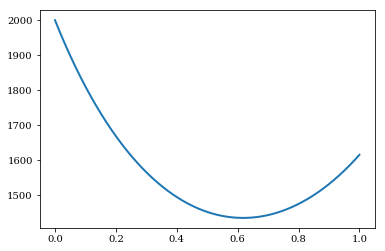

In [8]:
# x_best = optimize.minimize_scalar(llh, bounds=(0., 1.))

x_plot = np.linspace(0, 1, 10000, endpoint=True)
y_plot = llh(x_plot)

plt.figure()
plt.plot(x_plot,y_plot, lw=2)
# plt.axvline(x = x_best, lw=2)
plt.show()

In [9]:
x_plot[np.argmin(y_plot)]

0.6178617861786179

In [15]:
sigma = 0.01
pdf_B = np.zeros((x_plot.shape[0], B_spikes.shape[0]))
for i in range(pdf_B.shape[1]):
    pdf_B[:,i] = norm.pdf(x_plot, loc=B_spikes[i], scale=sigma) / pdf_B.shape[1]
pdf_B = np.sum(pdf_B, axis=1) 

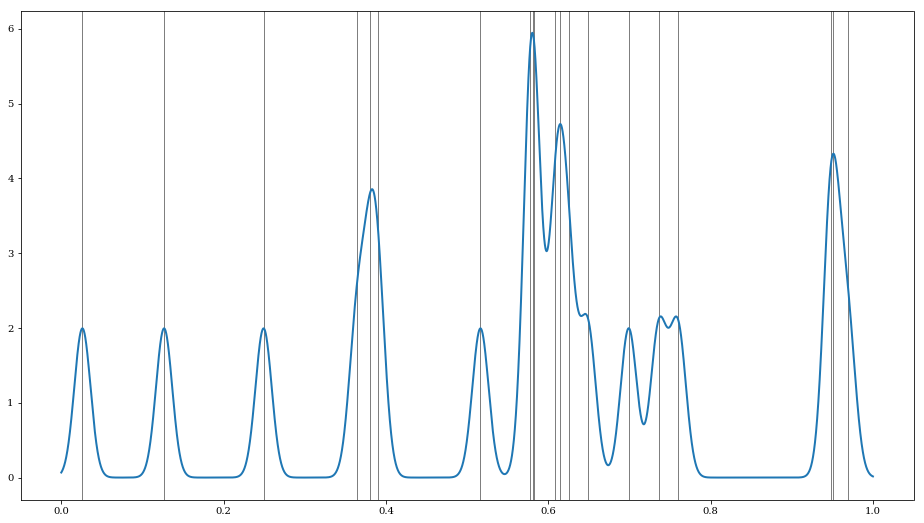

In [16]:
plt.figure(figsize=(16,9))
for s in B_spikes:
    plt.axvline(x=s, c='black', lw=0.5)
plt.plot(x_plot, pdf_B, lw=2)
plt.show()